In [1]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [3]:
# Load dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# datasets.mnist.load_data(): CIFAR dataset with TensorFlow, which splits it into a training set with 50,000 images and a testing set with 10,000 images.
# train_images: images used for training the model; 28x28 pixel grayscale representation of a handwritten digit (0-9).
# test_images: images used for testing the model

In [4]:
# Normalize pixel values: 
# This code rescales pixel values in train_images and test_images to the range of 0 to 1.
train_images, test_images = train_images / 255.0, test_images / 255.0

In [5]:
# Add a channels dimension to image data for handling color channels in TensorFlow.
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# [height, width, color]

In [6]:
# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [7]:
"""
The size of the images at each convolutional layer along with the ReLU activation:

First Convolutional Layer:
Input Size: 28x28x1 (Height x Width x Channels)
Number of Filters: 32
Convolutional Kernel Size: 3x3
Activation: ReLU
Output: Approximately 26x26x32

Max-Pooling Layer:
Pooling Window Size: 2x2
Output: Approximately 13x13x32

Second Convolutional Layer:
Input: 13x13x32
Filters: 64
Kernel Size: 3x3
Activation: ReLU
Output: Approximately 11x11x64

Max-Pooling Layer:
Pooling Size: 2x2
Output: Approximately 5x5x64

Third Convolutional Layer:
Input: 5x5x64
Filters: 64
Kernel Size: 3x3
Activation: ReLU
Output: Approximately 3x3x64
"""

'\nThe size of the images at each convolutional layer along with the ReLU activation:\n\nFirst Convolutional Layer:\nInput Size: 28x28x1 (Height x Width x Channels)\nNumber of Filters: 32\nConvolutional Kernel Size: 3x3\nActivation: ReLU\nOutput: Approximately 26x26x32\n\nMax-Pooling Layer:\nPooling Window Size: 2x2\nOutput: Approximately 13x13x32\n\nSecond Convolutional Layer:\nInput: 13x13x32\nFilters: 64\nKernel Size: 3x3\nActivation: ReLU\nOutput: Approximately 11x11x64\n\nMax-Pooling Layer:\nPooling Size: 2x2\nOutput: Approximately 5x5x64\n\nThird Convolutional Layer:\nInput: 5x5x64\nFilters: 64\nKernel Size: 3x3\nActivation: ReLU\nOutput: Approximately 3x3x64\n'

In [8]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# SparseCategoricalCrossentropy: labels are not continuous.
# from_logits=True: indicates that the model’s output values are raw, unnormalized scores (logits), and the loss function will apply the softmax activation function to convert these logits into probability distributions.

In [9]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8911 - loss: 0.3594 - val_accuracy: 0.9797 - val_loss: 0.0584
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9844 - loss: 0.0472 - val_accuracy: 0.9893 - val_loss: 0.0326
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9900 - loss: 0.0315 - val_accuracy: 0.9901 - val_loss: 0.0327
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9930 - loss: 0.0238 - val_accuracy: 0.9910 - val_loss: 0.0292
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9937 - loss: 0.0185 - val_accuracy: 0.9905 - val_loss: 0.0332
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9945 - loss: 0.0159 - val_accuracy: 0.9893 - val_loss: 0.0350
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9959 - loss: 0.0124 - val_accuracy: 0.9916 - val_loss: 0.0327
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9962 - loss: 0

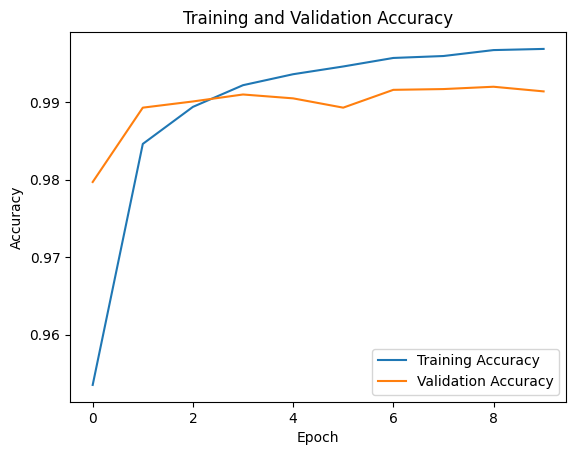

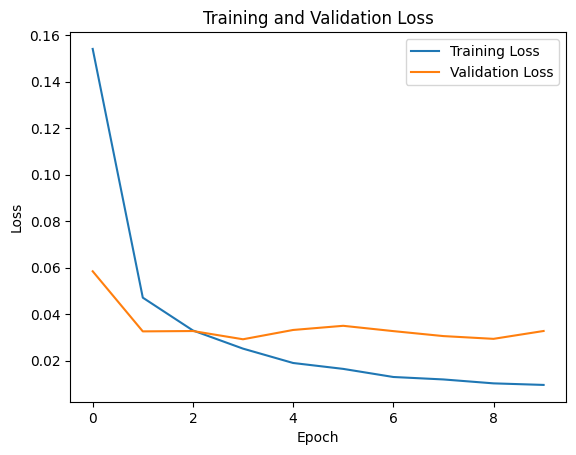

In [10]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Test the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.9914 - loss: 0.0327

Test accuracy: 0.9914000034332275


In [12]:
# Class names in CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [13]:
# Make predictions
predictions = model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


IndexError: invalid index to scalar variable.

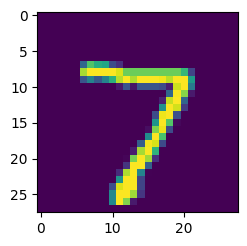

In [14]:
# Visualize the first 5 images and their predicted labels
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], interpolation='nearest')
    plt.title(f"Actual: {class_names[test_labels[i]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()